In [27]:
#import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [33]:
# Dataset path
data_dir = r"C:\Users\vikra\Lungs_cancer_detection_using_deeplearning\Dataset"

img_size = (128, 128)   # smaller size to avoid memory error
batch_size = 32
num_classes = 3         # normal, benign, malignant

# Load dataset into arrays
datagen = ImageDataGenerator(rescale=1./255)

dataset = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

X, y = [], []
for images, labels in dataset:
    X.extend(images)
    y.extend(labels)
    if len(X) >= dataset.samples:
        break

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)


Found 800 images belonging to 3 classes.
X shape: (800, 128, 128, 3)
y shape: (800,)


In [35]:
# Build CNN model function
def build_model(input_shape=(128, 128, 3), num_classes=3):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


--- Fold 1 ---


C:\Users\vikra\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 196ms/step - accuracy: 0.4972 - loss: 1.8354 - val_accuracy: 0.6125 - val_loss: 0.8419
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.7624 - loss: 0.5944 - val_accuracy: 0.7563 - val_loss: 0.5494
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.8494 - loss: 0.3267 - val_accuracy: 0.9688 - val_loss: 0.2284
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.9496 - loss: 0.1792 - val_accuracy: 0.9750 - val_loss: 0.1174
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.9584 - loss: 0.1193 - val_accuracy: 1.0000 - val_loss: 0.0473
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.9791 - loss: 0.0712 - val_accuracy: 1.0000 - val_loss: 0.0451
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9899 - loss: 0.0380 - val_accuracy: 1.0000 - val_loss: 0.0175
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9893 - loss: 0.0328 - val_accuracy: 1.

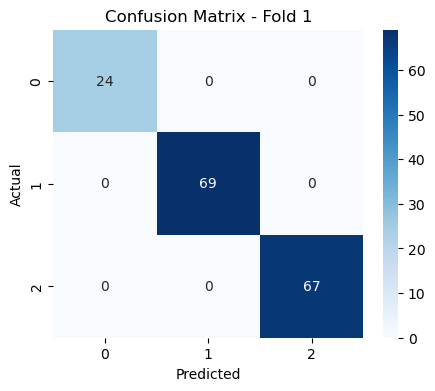

Fold 1 Accuracy: 1.00

--- Fold 2 ---
Epoch 1/10


C:\Users\vikra\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - accuracy: 0.4585 - loss: 2.2333 - val_accuracy: 0.6313 - val_loss: 0.7898
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 0.7430 - loss: 0.6417 - val_accuracy: 0.7188 - val_loss: 0.5745
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.8395 - loss: 0.4174 - val_accuracy: 0.9000 - val_loss: 0.3215
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.9231 - loss: 0.2419 - val_accuracy: 0.9000 - val_loss: 0.2560
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.9382 - loss: 0.1814 - val_accuracy: 0.9563 - val_loss: 0.1185
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.9623 - loss: 0.1137 - val_accuracy: 0.9625 - val_loss: 0.1039
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.9879 - loss: 0.0573 - val_accuracy: 0.9812 - val_loss: 0.0717
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - accuracy: 0.9897 - loss: 0.0608 - val_accuracy: 0.9875 - val_

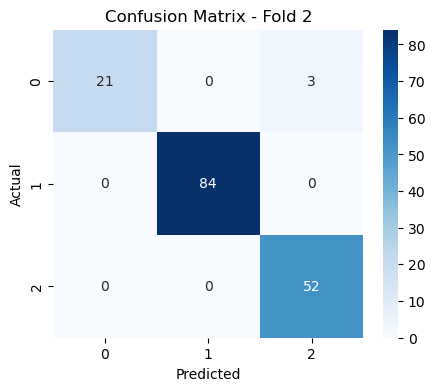

Fold 2 Accuracy: 0.98

--- Fold 3 ---
Epoch 1/10


C:\Users\vikra\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - accuracy: 0.5112 - loss: 2.4540 - val_accuracy: 0.8000 - val_loss: 0.5667
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.7697 - loss: 0.5555 - val_accuracy: 0.9125 - val_loss: 0.2939
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.9120 - loss: 0.2658 - val_accuracy: 0.9438 - val_loss: 0.1487
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.9408 - loss: 0.1546 - val_accuracy: 0.9625 - val_loss: 0.1284
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.9711 - loss: 0.1183 - val_accuracy: 0.9625 - val_loss: 0.1196
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - accuracy: 0.9723 - loss: 0.1052 - val_accuracy: 0.9812 - val_loss: 0.0487
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.9838 - loss: 0.0564 - val_accuracy: 0.9875 - val_loss: 0.0407
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.9854 - loss: 0.0396 - val_accuracy: 0.9812 - val_

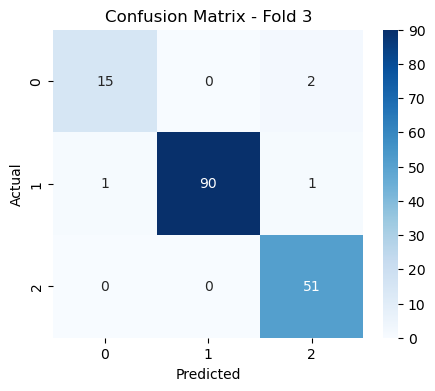

Fold 3 Accuracy: 0.97

--- Fold 4 ---
Epoch 1/10


C:\Users\vikra\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - accuracy: 0.4409 - loss: 1.9872 - val_accuracy: 0.7625 - val_loss: 0.6562
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.6682 - loss: 0.6894 - val_accuracy: 0.8375 - val_loss: 0.4153
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - accuracy: 0.8472 - loss: 0.4091 - val_accuracy: 0.9438 - val_loss: 0.2094
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.9187 - loss: 0.2382 - val_accuracy: 0.9500 - val_loss: 0.1718
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - accuracy: 0.9526 - loss: 0.1503 - val_accuracy: 0.9812 - val_loss: 0.0775
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - accuracy: 0.9666 - loss: 0.0773 - val_accuracy: 0.9875 - val_loss: 0.0627
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.9866 - loss: 0.0603 - val_accuracy: 0.9875 - val_loss: 0.0550
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - accuracy: 0.9881 - loss: 0.0463 - val_accuracy: 0.9937 - val_

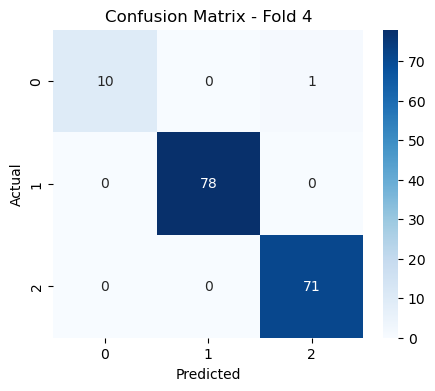

Fold 4 Accuracy: 0.99

--- Fold 5 ---
Epoch 1/10


C:\Users\vikra\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.4355 - loss: 2.2862 - val_accuracy: 0.6562 - val_loss: 0.7673
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.7212 - loss: 0.7112 - val_accuracy: 0.7812 - val_loss: 0.5162
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.8365 - loss: 0.4255 - val_accuracy: 0.8625 - val_loss: 0.3319
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 0.9047 - loss: 0.2638 - val_accuracy: 0.9500 - val_loss: 0.1692
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - accuracy: 0.9674 - loss: 0.1155 - val_accuracy: 0.9750 - val_loss: 0.1033
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - accuracy: 0.9795 - loss: 0.0918 - val_accuracy: 0.9812 - val_loss: 0.0672
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - accuracy: 0.9699 - loss: 0.0968 - val_accuracy: 0.9875 - val_loss: 0.0397
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 0.9926 - loss: 0.0329 - val_accuracy: 0.9875 - val_

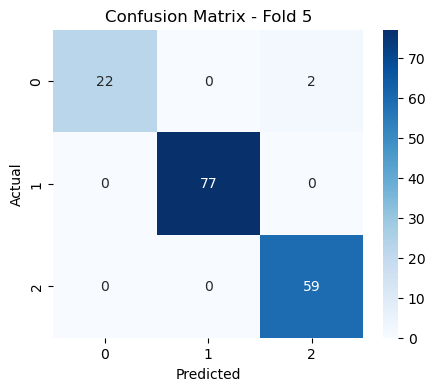

Fold 5 Accuracy: 0.99


In [37]:
# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_no = 1
all_reports = []
all_accuracies = []

for train_idx, val_idx in kf.split(X, y):
    print(f"\n--- Fold {fold_no} ---")

    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    model = build_model(input_shape=(128,128,3), num_classes=num_classes)

    history = model.fit(
        X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_val, y_val),
        verbose=1
    )

    # Predictions
    y_pred = np.argmax(model.predict(X_val), axis=1)

    # Classification report
    report = classification_report(y_val, y_pred, output_dict=True)
    all_reports.append(report)

    # Confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - Fold {fold_no}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    acc = report['accuracy']
    all_accuracies.append(acc)
    print(f"Fold {fold_no} Accuracy: {acc:.2f}")

    fold_no += 1

In [39]:
# Average Metrics
avg_accuracy = np.mean(all_accuracies)
avg_precision = np.mean([r['weighted avg']['precision'] for r in all_reports])
avg_recall = np.mean([r['weighted avg']['recall'] for r in all_reports])
avg_f1 = np.mean([r['weighted avg']['f1-score'] for r in all_reports])

print("\n==== Final Cross-Validation Results ====")
print(f"Average Accuracy:  {avg_accuracy:.2f}")
print(f"Average Precision: {avg_precision:.2f}")
print(f"Average Recall:    {avg_recall:.2f}")
print(f"Average F1-score:  {avg_f1:.2f}")


==== Final Cross-Validation Results ====
Average Accuracy:  0.99
Average Precision: 0.99
Average Recall:    0.99
Average F1-score:  0.99
